<a href="https://colab.research.google.com/github/Marco-MM/Coursera-Build-a-Modern-Computer-from-First-Principles-From-Nand-to-Tetris/blob/master/Codecademy_Tensorflow_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook for Final Project of Codecademy's Build Deep Learning Models with TensorFlow**

Project: Forest Cover Classification

[Link to Codecademy Page](https://www.codecademy.com/paths/build-deep-learning-models-with-tensorflow/tracks/dlsp-deep-learning-portfolio-project-track/modules/dlsp-deep-learning-portfolio-project-module/kanban_projects/deep-learning-cover-classification-portfolio-project)

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report


In [ ]:
print(tf.__version__)

2.7.0


# Prepocess and Explore Dataset

[ x ] Upload dataset to repository

[ x ] Get stats on dataset (cols, num samples, sample of data)

[ x ] Split dataset into 3: training, validation, and test set

[ x ] Review data and determine how to preprocess. Write further steps after this one.

[ x ] Scale data using columnTransformer and standardScaler

[ x ] Convert labels into one-hot-encodings (format needed for our cross-entropy loss)





In [ ]:
cover_dataframe = pd.read_csv('/content/drive/MyDrive/Codecademy Projects/Tensorflow/cover_data.csv')

# Visualize dataset 
cover_dataframe

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Get metadata on dataset
cover_dataframe.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
for column in list(cover_dataframe):

  cover_dataframe[column].fillna(0, inplace = True)


In [ ]:
# Further preprocess data

# Extract labels column

labels = cover_dataframe['class']
print(labels)
print(labels.unique())

features = cover_dataframe.drop('class', axis=1)

print(features)
print(features.describe())


0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: class, Length: 581012, dtype: int64
[5 2 1 7 3 6 4]
        Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0            2596      51      3  ...            0            0            0
1            2590      56      2  ...            0            0            0
2            2804     139      9  ...            0            0            0
3            2785     155     18  ...            0            0            0
4            2595      45      2  ...            0            0            0
...           ...     ...    ...  ...          ...          ...          ...
581007       2396     153     20  ...            0            0            0
581008       2391     152     19  ...            0            0            0
581009       2386     159     17  ...            0            0            0
581010       2384     170     15  ...   

In [ ]:
# convert the categorical features in features dataframe to one-hot encoding vectors 

features = pd.get_dummies(features)

print(features)
print(features.describe())

# Split dataset into training and testing dataset

features_train, features_test, labels_train, labels_test = model_selection.train_test_split(features, labels, test_size=0.2)


        Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0            2596      51      3  ...            0            0            0
1            2590      56      2  ...            0            0            0
2            2804     139      9  ...            0            0            0
3            2785     155     18  ...            0            0            0
4            2595      45      2  ...            0            0            0
...           ...     ...    ...  ...          ...          ...          ...
581007       2396     153     20  ...            0            0            0
581008       2391     152     19  ...            0            0            0
581009       2386     159     17  ...            0            0            0
581010       2384     170     15  ...            0            0            0
581011       2383     165     13  ...            0            0            0

[581012 rows x 54 columns]
           Elevation         Aspect  ...    Soil

In [ ]:
# Use sklearn's ColumnTransformer to scale features of dataset 
#print(features_train)
features_headers = list(features_train)
features_headers_to_scale = features_headers[:10]

ct = ColumnTransformer(
    [("numeric", StandardScaler(), features_headers_to_scale)],
    remainder='passthrough'
    )
og_features_train = features_train
og_features_test = features_test
features_train = ct.fit_transform(features_train)
#print(features_train)


In [ ]:
# No need for labelEncoder since labels are already numeric
# Use to_categorical to transform labels into binary vectors
print(labels_train.unique())
labels_train = tf.keras.utils.to_categorical(labels_train)
labels_test = tf.keras.utils.to_categorical(labels_test)
print(labels_test[0])

[2 7 1 3 6 5 4]
[0. 1. 0. 0. 0. 0. 0. 0.]


# Build and Train Model
[ x ] Create simple tensorflow model

[ x ] Decide parameters (layers, activation, epochs, etc.)

[ x ] Confirm dimensions

[ x ] Compile successfully

[ x ] Train model with training set

In [ ]:
# Create model object

class Model:
  def __init__(self, name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split):
    self.name = name
    self.model_arc = Sequential()
    # Input layer
    self.model_arc.add(InputLayer(input_shape= (train_inputs.shape[1], )))

    for i in range(len(layers)):
      if layers[i] == 'dropout':
        self.model_arc.add(Dropout(0.1))
      else:
        self.model_arc.add(Dense(layerSizes[i], activation = layers[i]))
    
    self.model_arc.compile(loss=loss,optimizer=opt,metrics=metrics)

    stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    self.history = self.model_arc.fit(features_train, labels_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_split=0.20, callbacks=[stop])


# Adjust Hyperparameters

[ x ] Write out all hyperparameters in single cell

[ x ] Decide systematic way to test different hyperparameters


# Test different model structures and plot results


In [ ]:

# Basic module structure
train_inputs = features_train
train_labels = labels_train
loss = 'categorical_crossentropy'
metrics = ['accuracy']
EPOCHS = 100
BATCH_SIZE = 100
LR = 0.01
opt  = tf.keras.optimizers.Adam(learning_rate=LR)
patience = 10
val_split = 0.20

# Module structure 1
name = 'model_1'
layers = ['softmax']
layerSizes = ['8']
model_1 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model structure 2
name = 'model_2'
layers = ['relu', 'sigmoid','relu', 'softmax']
layerSizes = ['128','128','128','8']
model_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model structure 3
name = 'model_3'
layers = ['relu', 'softmax']
layerSizes = ['128','8']
model_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model structure 4
name = 'model_4'
layers = ['relu','relu','softmax']
layerSizes = ['128','128','8']
model_4 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model structure 5
name = 'model_5'
layers = ['relu','relu', 'relu', 'softmax']
layerSizes = ['128','128','128','8']
model_5 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)



Epoch 1/100
3719/3719 [==============================] - 31s 8ms/step - loss: 0.6672 - accuracy: 0.7129 - val_loss: 0.6395 - val_accuracy: 0.7232
Epoch 2/100
3719/3719 [==============================] - 23s 6ms/step - loss: 0.6376 - accuracy: 0.7208 - val_loss: 0.6356 - val_accuracy: 0.7210
Epoch 3/100
3719/3719 [==============================] - 16s 4ms/step - loss: 0.6360 - accuracy: 0.7212 - val_loss: 0.6379 - val_accuracy: 0.7188
Epoch 4/100
3719/3719 [==============================] - 16s 4ms/step - loss: 0.6356 - accuracy: 0.7218 - val_loss: 0.6345 - val_accuracy: 0.7207
Epoch 5/100
3719/3719 [==============================] - 16s 4ms/step - loss: 0.6352 - accuracy: 0.7211 - val_loss: 0.6336 - val_accuracy: 0.7240
Epoch 6/100
3719/3719 [==============================] - 16s 4ms/step - loss: 0.6356 - accuracy: 0.7220 - val_loss: 0.6330 - val_accuracy: 0.7210
Epoch 7/100
3719/3719 [==============================] - 16s 4ms/step - loss: 0.6354 - accuracy: 0.7215 - val_loss: 0.6353 -

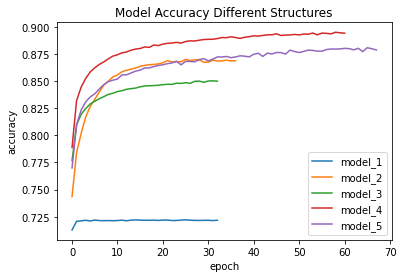

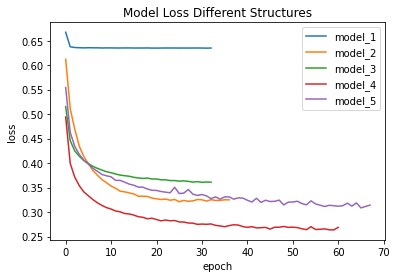

<Figure size 432x288 with 0 Axes>

In [ ]:

# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# Plot model accuracy
plt.title('Model Accuracy Different Structures')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(model_1.history.history['accuracy'])
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_3.history.history['accuracy'])
plt.plot(model_4.history.history['accuracy'])
plt.plot(model_5.history.history['accuracy'])
plt.legend(['model_1','model_2','model_3','model_4', 'model_5'], loc='lower right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_structures_acc.png')

# Plot model loss
plt.title('Model Loss Different Structures')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(model_1.history.history['loss'])
plt.plot(model_2.history.history['loss'])
plt.plot(model_3.history.history['loss'])
plt.plot(model_4.history.history['loss'])
plt.plot(model_5.history.history['loss'])
plt.legend(['model_1','model_2','model_3','model_4', 'model_5'], loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_structures_loss.png')


# From best model structure, test different layer sizes

In [ ]:
'''
# Basic module structure
train_inputs = features_train
train_labels = labels_train
loss = 'categorical_crossentropy'
metrics = ['accuracy']
EPOCHS = 100
BATCH_SIZE = 100
LR = 0.01
opt  = tf.keras.optimizers.Adam(learning_rate=LR)
patience = 5
val_split = 0.20

# Model layer size 1
name = 'model_4_1'
layers = ['relu','relu','softmax']
layerSizes = ['8','8','8']
model_4_1 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 2
name = 'model_4_2'
layers = ['relu','relu','softmax']
layerSizes = ['64','64','8']
model_4_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 3
name = 'model_4_3'
layers = ['relu','relu','softmax']
layerSizes = ['128','128','8']
model_4_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 4
name = 'model_4_4'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 5
name = 'model_4_5'
layers = ['relu','relu','softmax']
layerSizes = ['128','256','8']
model_4_5 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

'''

"\n# Basic module structure\ntrain_inputs = features_train\ntrain_labels = labels_train\nloss = 'categorical_crossentropy'\nmetrics = ['accuracy']\nEPOCHS = 100\nBATCH_SIZE = 100\nLR = 0.01\nopt  = tf.keras.optimizers.Adam(learning_rate=LR)\npatience = 5\nval_split = 0.20\n\n# Model layer size 1\nname = 'model_4_1'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['8','8','8']\nmodel_4_1 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 2\nname = 'model_4_2'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['64','64','8']\nmodel_4_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 3\nname = 'model_4_3'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['128','128','8']\nmodel_4_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_sp

In [ ]:
'''
# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model Accuracy Different Layer Sizes')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# Plot model accuracy
plt.plot(model_4_1.history.history['accuracy'])
plt.plot(model_4_2.history.history['accuracy'])
plt.plot(model_4_3.history.history['accuracy'])
plt.plot(model_4_4.history.history['accuracy'])
plt.plot(model_4_5.history.history['accuracy'])
plt.legend(['model_4_1','model_4_2','model_4_3','model_4_4','model_4_5'], loc='lower_right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_acc.png')

# Plot model loss
plt.title('Model Loss Different Layer Sizes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(model_4_1.history.history['loss'])
plt.plot(model_4_2.history.history['loss'])
plt.plot(model_4_3.history.history['loss'])
plt.plot(model_4_4.history.history['loss'])
plt.plot(model_4_5.history.history['loss'])
plt.legend(['model_4_1','model_4_2','model_4_3','model_4_4','model_4_5'], loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_loss.png')
'''

"\n# Create plot figure\nfig = plt.figure()\nax1 = fig.add_subplot(1, 1, 1)\nplt.title('Model Accuracy Different Layer Sizes')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\n\n# Plot model accuracy\nplt.plot(model_4_1.history.history['accuracy'])\nplt.plot(model_4_2.history.history['accuracy'])\nplt.plot(model_4_3.history.history['accuracy'])\nplt.plot(model_4_4.history.history['accuracy'])\nplt.plot(model_4_5.history.history['accuracy'])\nplt.legend(['model_4_1','model_4_2','model_4_3','model_4_4','model_4_5'], loc='lower_right')\nplt.show()\nplt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_acc.png')\n\n# Plot model loss\nplt.title('Model Loss Different Layer Sizes')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.plot(model_4_1.history.history['loss'])\nplt.plot(model_4_2.history.history['loss'])\nplt.plot(model_4_3.history.history['loss'])\nplt.plot(model_4_4.history.history['loss'])\nplt.plot(model_4_5.history.history['loss'])\nplt.legend(['model_4_1','mod

In [ ]:
'''
# Basic module structure
train_inputs = features_train
train_labels = labels_train
loss = 'categorical_crossentropy'
metrics = ['accuracy']
EPOCHS = 100
BATCH_SIZE = 100
LR = 0.01
opt  = tf.keras.optimizers.Adam(learning_rate=LR)
patience = 5
val_split = 0.20

# Model layer size 4
name = 'model_4_4'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 5
name = 'model_4_5'
layers = ['relu','relu','softmax']
layerSizes = ['512','512','8']
model_4_5 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 6
name = 'model_4_6'
layers = ['relu','relu','softmax']
layerSizes = ['1024','1024','8']
model_4_6 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)
'''



"\n# Basic module structure\ntrain_inputs = features_train\ntrain_labels = labels_train\nloss = 'categorical_crossentropy'\nmetrics = ['accuracy']\nEPOCHS = 100\nBATCH_SIZE = 100\nLR = 0.01\nopt  = tf.keras.optimizers.Adam(learning_rate=LR)\npatience = 5\nval_split = 0.20\n\n# Model layer size 4\nname = 'model_4_4'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['256','256','8']\nmodel_4_4 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 5\nname = 'model_4_5'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['512','512','8']\nmodel_4_5 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 6\nname = 'model_4_6'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['1024','1024','8']\nmodel_4_6 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience

In [ ]:
'''
# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model Accuracy Different Layer Sizes Cont.')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# Plot model accuracy
plt.plot(model_4_4.history.history['accuracy'])
plt.plot(model_4_5.history.history['accuracy'])
plt.plot(model_4_6.history.history['accuracy'])
plt.legend(['model_4_4','model_4_5','model_4_6'], loc='lower right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_acc_cont.png')

# Plot model loss
plt.title('Model Loss Different Layer Sizes Cont.')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(model_4_4.history.history['loss'])
plt.plot(model_4_5.history.history['loss'])
plt.plot(model_4_6.history.history['loss'])
plt.legend(['model_4_4','model_4_5','model_4_6'], loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_loss_cont.png')
'''

"\n# Create plot figure\nfig = plt.figure()\nax1 = fig.add_subplot(1, 1, 1)\nplt.title('Model Accuracy Different Layer Sizes Cont.')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\n\n# Plot model accuracy\nplt.plot(model_4_4.history.history['accuracy'])\nplt.plot(model_4_5.history.history['accuracy'])\nplt.plot(model_4_6.history.history['accuracy'])\nplt.legend(['model_4_4','model_4_5','model_4_6'], loc='lower right')\nplt.show()\nplt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_acc_cont.png')\n\n# Plot model loss\nplt.title('Model Loss Different Layer Sizes Cont.')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.plot(model_4_4.history.history['loss'])\nplt.plot(model_4_5.history.history['loss'])\nplt.plot(model_4_6.history.history['loss'])\nplt.legend(['model_4_4','model_4_5','model_4_6'], loc='upper right')\nplt.show()\nplt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_sizes_loss_cont.png')\n"

# Trying Dropout to see changes

In [ ]:
'''
# Basic module structure
train_inputs = features_train
train_labels = labels_train
loss = 'categorical_crossentropy'
metrics = ['accuracy']
EPOCHS = 100
BATCH_SIZE = 100
LR = 0.01
opt  = tf.keras.optimizers.Adam(learning_rate=LR)
patience = 5
val_split = 0.20

# Model layer size 4 with 1 dropout layer
name = 'model_4_4_2'
layers = ['relu','dropout','relu','softmax']
layerSizes = ['256','','256','8']
model_4_4_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 4 with 1 dropout layer
name = 'model_4_4_3'
layers = ['relu','dropout','relu','dropout', 'softmax']
layerSizes = ['256','','256','','8']
model_4_4_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 4
name = 'model_4_4_1'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4_1 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)
'''


"\n# Basic module structure\ntrain_inputs = features_train\ntrain_labels = labels_train\nloss = 'categorical_crossentropy'\nmetrics = ['accuracy']\nEPOCHS = 100\nBATCH_SIZE = 100\nLR = 0.01\nopt  = tf.keras.optimizers.Adam(learning_rate=LR)\npatience = 5\nval_split = 0.20\n\n# Model layer size 4 with 1 dropout layer\nname = 'model_4_4_2'\nlayers = ['relu','dropout','relu','softmax']\nlayerSizes = ['256','','256','8']\nmodel_4_4_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 4 with 1 dropout layer\nname = 'model_4_4_3'\nlayers = ['relu','dropout','relu','dropout', 'softmax']\nlayerSizes = ['256','','256','','8']\nmodel_4_4_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 4\nname = 'model_4_4_1'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['256','256','8']\nmodel_4_4_1 = Model(name, laye

In [ ]:
'''
# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model Accuracy w/wo dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# Plot model accuracy
plt.plot(model_4_4_1.history.history['accuracy'])
plt.plot(model_4_4_2.history.history['accuracy'])
plt.plot(model_4_4_3.history.history['accuracy'])
plt.legend(['model_4_4_1','model_4_4_2','model_4_4_3'], loc='lower right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/dropout_acc.png')

# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model Loss w/wo dropout')
plt.ylabel('loss')
plt.xlabel('epoch')

# Plot model loss
plt.plot(model_4_4_1.history.history['loss'])
plt.plot(model_4_4_2.history.history['loss'])
plt.plot(model_4_4_3.history.history['loss'])
plt.legend(['model_4_4_1','model_4_4_2','model_4_4_3'], loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/dropout_loss.png')
'''

"\n# Create plot figure\nfig = plt.figure()\nax1 = fig.add_subplot(1, 1, 1)\nplt.title('Model Accuracy w/wo dropout')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\n\n# Plot model accuracy\nplt.plot(model_4_4_1.history.history['accuracy'])\nplt.plot(model_4_4_2.history.history['accuracy'])\nplt.plot(model_4_4_3.history.history['accuracy'])\nplt.legend(['model_4_4_1','model_4_4_2','model_4_4_3'], loc='lower right')\nplt.show()\nplt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/dropout_acc.png')\n\n# Create plot figure\nfig = plt.figure()\nax1 = fig.add_subplot(1, 1, 1)\nplt.title('Model Loss w/wo dropout')\nplt.ylabel('loss')\nplt.xlabel('epoch')\n\n# Plot model loss\nplt.plot(model_4_4_1.history.history['loss'])\nplt.plot(model_4_4_2.history.history['loss'])\nplt.plot(model_4_4_3.history.history['loss'])\nplt.legend(['model_4_4_1','model_4_4_2','model_4_4_3'], loc='upper right')\nplt.show()\nplt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/dropout_loss

# Try different batch sizes

In [ ]:

# Basic module structure
train_inputs = features_train
train_labels = labels_train
loss = 'categorical_crossentropy'
metrics = ['accuracy']
EPOCHS = 100
BATCH_SIZE = 100
LR = 0.01
opt  = tf.keras.optimizers.Adam(learning_rate=LR)
patience = 5
val_split = 0.20

# Model layer size 4 with no dropout layer and batch size 100
name = 'model_4_4_1_1'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4_1_1 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)
'''
# Model layer size 4 with no dropout layer and batch size 16
BATCH_SIZE = 16
name = 'model_4_4_1_2'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4_1_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)

# Model layer size 4 with no dropout layer and batch size 32
BATCH_SIZE = 32
name = 'model_4_4_1_3'
layers = ['relu','relu','softmax']
layerSizes = ['256','256','8']
model_4_4_1_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)
'''

Epoch 1/100
3719/3719 [==============================] - 30s 8ms/step - loss: 0.4944 - accuracy: 0.7891 - val_loss: 0.4226 - val_accuracy: 0.8230
Epoch 2/100
3719/3719 [==============================] - 28s 8ms/step - loss: 0.3849 - accuracy: 0.8400 - val_loss: 0.3552 - val_accuracy: 0.8530
Epoch 3/100
3719/3719 [==============================] - 32s 9ms/step - loss: 0.3453 - accuracy: 0.8581 - val_loss: 0.3463 - val_accuracy: 0.8569
Epoch 4/100
3719/3719 [==============================] - 18s 5ms/step - loss: 0.3243 - accuracy: 0.8679 - val_loss: 0.3167 - val_accuracy: 0.8704
Epoch 5/100
3719/3719 [==============================] - 18s 5ms/step - loss: 0.3096 - accuracy: 0.8748 - val_loss: 0.2954 - val_accuracy: 0.8794
Epoch 6/100
3719/3719 [==============================] - 17s 5ms/step - loss: 0.2994 - accuracy: 0.8791 - val_loss: 0.3084 - val_accuracy: 0.8764
Epoch 7/100
3719/3719 [==============================] - 17s 5ms/step - loss: 0.2917 - accuracy: 0.8826 - val_loss: 0.2992 -

"\n# Model layer size 4 with no dropout layer and batch size 16\nBATCH_SIZE = 16\nname = 'model_4_4_1_2'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['256','256','8']\nmodel_4_4_1_2 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n\n# Model layer size 4 with no dropout layer and batch size 32\nBATCH_SIZE = 32\nname = 'model_4_4_1_3'\nlayers = ['relu','relu','softmax']\nlayerSizes = ['256','256','8']\nmodel_4_4_1_3 = Model(name, layers, layerSizes, train_inputs, train_labels, loss, opt, metrics, EPOCHS, BATCH_SIZE, patience, val_split)\n"

In [ ]:

# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model_4_4_1_1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# Plot model accuracy
plt.plot(model_4_4_1_1.history.history['accuracy'])
plt.legend(['model_4_4_1_1'], loc='lower right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_batch_acc.png')

# Create plot figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.title('Model_4_4_1_1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Plot model loss
plt.plot(model_4_4_1_1.history.history['loss'])
plt.plot(model_4_4_1_2.history.history['loss'])
plt.plot(model_4_4_1_3.history.history['loss'])
plt.legend(['model_4_4_1_1','model_4_4_1_2','model_4_4_1_3'], loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Codecademy Projects/Tensorflow/diff_batch_loss.png')


SyntaxError: ignored

# Test Model

[ x ] Set up testing metrics/baseline

[ x ] Compile testing report on best model

[ x ] Test model on testing set after training and validation



In [ ]:
# Use dummy classifier as baseline for comparison

# Accuracy of making random prediction
rand_dummy_classifier = DummyClassifier(strategy='uniform')

rand_dummy_classifier.fit(og_features_train, labels_train)
rand_dummy_classifier.predict(og_features_test)
prob = rand_dummy_classifier.score(og_features_train, labels_train)
print("Random pred. = " + str(round(prob*100,4)) + ' %')

# Accuracy of predicting single category every time for all categories
total_prob = 0
for i in range(1,8):
  cat = np.zeros(8)
  cat[i] = 1
  const_dummy_classifier = DummyClassifier(strategy='constant', constant=cat)
  const_dummy_classifier.fit(og_features_train, labels_train)
  const_dummy_classifier.predict(og_features_test)
  prob = const_dummy_classifier.score(og_features_train, labels_train)
  total_prob += prob
  print("Pred. always type " + str(i) + " = " + str(round(prob*100,4)) + ' %')

print(total_prob)


total_prob = 0
for i in range(1,8):
  cat = np.zeros(8)
  cat[i] = 1
  const_dummy_classifier = DummyClassifier(strategy='constant', constant=cat)
  const_dummy_classifier.fit(features_test, labels_test)
  const_dummy_classifier.predict(features_test)
  prob = const_dummy_classifier.score(features_test, labels_test)
  total_prob += prob
  print("Pred. always type " + str(i) + " = " + str(round(prob*100,4)) + ' %')

print(total_prob)



Random pred. = 0.7775 %
Pred. always type 1 = 36.4539 %
Pred. always type 2 = 48.7194 %
Pred. always type 3 = 6.1722 %
Pred. always type 4 = 0.4733 %
Pred. always type 5 = 1.6381 %
Pred. always type 6 = 3.007 %
Pred. always type 7 = 3.5361 %
1.0
Pred. always type 1 = 36.487 %
Pred. always type 2 = 48.9221 %
Pred. always type 3 = 6.0799 %
Pred. always type 4 = 0.4707 %
Pred. always type 5 = 1.617 %
Pred. always type 6 = 2.9173 %
Pred. always type 7 = 3.5059 %
0.9999999999999999


In [ ]:
# Best model from experiments: model_4_4_1_1


#tf.keras.models.save_model(model_4_4_1_1.model_arc,'/content/drive/MyDrive/Codecademy Projects/Tensorflow/')
#chosen_model = tf.keras.models.load_model('/content/drive/MyDrive/Codecademy Projects/Tensorflow/')
chosen_model = model_4_4_1_1.model_arc

# Deploy Model

[ x ] Get model predictions of testing set

[ x ] Save results

In [ ]:

labels_estimate = chosen_model.predict(og_features_test)
print(labels_estimate)

labels_estimate_typelist = np.argmax(labels_estimate, axis=1)
print(labels_estimate_typelist)
print(np.unique(labels_estimate_typelist))
print(labels_test)
labels_test_typelist = np.argmax(labels_test, axis=1)
print(labels_test_typelist)
print(np.unique(labels_test_typelist))

print(classification_report(labels_test_typelist, labels_estimate_typelist))

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[1 1 1 ... 1 1 1]
[1 2]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[2 1 1 ... 2 1 2]
[1 2 3 4 5 6 7]
              precision    recall  f1-score   support

           1       0.37      0.96      0.54     42608
           2       0.74      0.07      0.14     56497
           3       0.00      0.00      0.00      7132
           4       0.00      0.00      0.00       545
           5       0.00      0.00      0.00      1864
           6       0.00      0.00      0.00      3473
           7       0.00      0.00      0.00      4084

    accuracy                           0.39    116203
   macro avg       0.16      0.15      0.10    116203
weighted avg       0.50      0.39      0.26    116203



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(labels_test_typelist, labels_estimate_typelist))

[[41107  1501     0     0     0     0     0]
 [52264  4233     0     0     0     0     0]
 [ 7132     0     0     0     0     0     0]
 [  545     0     0     0     0     0     0]
 [ 1863     1     0     0     0     0     0]
 [ 3473     0     0     0     0     0     0]
 [ 4084     0     0     0     0     0     0]]
